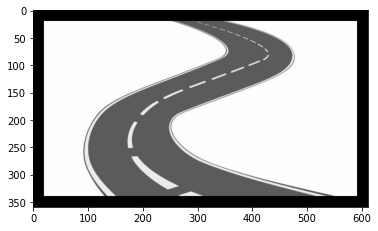

(359, 612, 3)
(359, 612, 3)
<built-in method astype of numpy.ndarray object at 0x00000142B6B00390>


In [1037]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2

img = mpimg.imread('road.jpg')
cropped_array = img[20:img.shape[0]-20, 20:img.shape[1]-20, :]
padded_array = np.pad(cropped_array, ((20, 20), (20, 20), (0, 0)))
# padded_array=padded_array[...,::-1]
# plt.imshow(cv2.cvtColor(padded_array, cv2.COLOR_BGR2RGB))

plt.imshow(padded_array)
plt.show()
print(img.shape)
print(padded_array.shape)
print(img.astype)

In [1038]:
def mod_image(path,dim1,dim2):
    image = Image.open(path)
    new_image = image.resize((dim1, dim2))
    np_img = np.array(new_image)
    return np_img

In [1039]:
def border(img):
    x=1
    cropped_array = img[x:img.shape[0]-x, x:img.shape[1]-x, :]
    return np.pad(cropped_array, ((x, x), (x, x), (0, 0)))

In [1040]:
from operator import add
from functools import reduce

def split4(image):
    half_split = np.array_split(image, 2)
    print(half_split[0].shape)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    print(res)
    return reduce(add, res)

In [1041]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

In [1042]:
def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

In [1043]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1, 2)
            .reshape(-1, nrows, ncols))

In [1044]:
from collections import defaultdict
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:

    tile_num=0
    tiles= defaultdict(dict)
    a = {}
    count = defaultdict(lambda:0,a)

    def insert(self, img,matrix,level = 0):
        self.level = level
        #self.mean = calculate_mean(img).astype(int)
        #self.resolution = (img.shape[0], img.shape[1])
        self.img=img
        QuadTree.tiles[level][QuadTree.count[level]]=self
        QuadTree.count[level]+=1
        self.final = True

        if not checkEqual(matrix):
            split_img = split4(img)

            self.final = False

            n_w, n_e, s_w, s_e =  split(matrix, matrix.shape[0]//2, matrix.shape[1]//2)

            self.north_west = QuadTree().insert(split_img[0],n_w, level + 1)
            self.north_east = QuadTree().insert(split_img[1],n_e, level + 1)
            self.south_west = QuadTree().insert(split_img[2],s_w, level + 1)
            self.south_east = QuadTree().insert(split_img[3],s_e, level + 1)

        return self

    def get_image(self, level):
        if(self.final or self.level == level):
            #return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
            # plt.imshow(self.img)
            # plt.show()
            return border(self.img)

        return concatenate4(
            self.north_west.get_image(level),
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))




In [1045]:
def update_tile(qd=QuadTree(),new_image=0):
    qd.img=new_image

In [1046]:
matrix = np.random.randint(2, size=(16,16))
# matrix = np.random.randint(2, size=(img.shape[0], img.shape[1]))
# matrix = []
#
# with open ("input.txt", "r") as myfile:
#     data = myfile.read().splitlines()
# # print(text)
# for line in data:
#     # print(text)
#     list_of_ints = list(map(int, line))
#     matrix.append(list_of_ints)
# # with open('input.txt', 'r') as f:
# #     lines = f.split("\n")
# #     for line in lines:
# #         # line = f.read().splitlines()
# #         print(line)
# #         print(type(line))
# #         # list_of_ints = list(map(int, line))
# #         list_of_ints = [int(x) for x in line]
# #         # print(list_of_ints)
# #         # matrix.append(list_of_ints)
#
# matrix = np.array(matrix)
# # # print(input)
print(matrix)
print(matrix.shape)


[[0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1]
 [0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0]
 [0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1]
 [0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0]
 [0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0]
 [1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1]
 [1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0]
 [0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1]
 [0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0]]
(16, 16)


In [1047]:
quadtree = QuadTree().insert(img,matrix)
# plt.imshow(quadtree.get_image(5))
# plt.show()
# plt.imshow(quadtree.get_image(3))
# plt.show()
# plt.imshow(quadtree.get_image(7))
# plt.show()
# plt.imshow(quadtree.get_image(10))
# plt.show()

(180, 612, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(23, 77, 3)
(23, 76, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(22, 77, 3)
(45, 153, 3)
(23, 77, 3)
(22, 77, 3)
(90, 306, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(45, 153, 3)
(23, 77, 3)
(23, 76, 3)
(22, 77, 3)
(22, 76, 3)
(45, 153, 3)
(22, 76, 3)


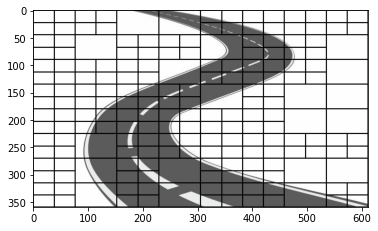

In [1048]:
plt.imshow(quadtree.get_image(4))
plt.show()

In [1049]:
print(type(quadtree))
print(QuadTree.tiles)

<class '__main__.QuadTree'>
defaultdict(<class 'dict'>, {0: {0: <__main__.QuadTree object at 0x00000142B679D310>}, 1: {0: <__main__.QuadTree object at 0x00000142B679D190>, 1: <__main__.QuadTree object at 0x00000142B6AF72E0>, 2: <__main__.QuadTree object at 0x00000142B21759D0>, 3: <__main__.QuadTree object at 0x00000142B679DFA0>}, 2: {0: <__main__.QuadTree object at 0x00000142B3756850>, 1: <__main__.QuadTree object at 0x00000142B21757F0>, 2: <__main__.QuadTree object at 0x00000142B7B7E880>, 3: <__main__.QuadTree object at 0x00000142B679DAC0>, 4: <__main__.QuadTree object at 0x00000142B6AF7CD0>, 5: <__main__.QuadTree object at 0x00000142B7B7E160>, 6: <__main__.QuadTree object at 0x00000142B6AF72B0>, 7: <__main__.QuadTree object at 0x00000142B6AF7F70>, 8: <__main__.QuadTree object at 0x00000142B7B7EBE0>, 9: <__main__.QuadTree object at 0x00000142B37562E0>, 10: <__main__.QuadTree object at 0x00000142B6961220>, 11: <__main__.QuadTree object at 0x00000142B6961FA0>, 12: <__main__.QuadTree obj

5
176
{0: <__main__.QuadTree object at 0x00000142B2175CD0>, 1: <__main__.QuadTree object at 0x00000142B2175D60>, 2: <__main__.QuadTree object at 0x00000142B2175280>, 3: <__main__.QuadTree object at 0x00000142B3756B20>, 4: <__main__.QuadTree object at 0x00000142B2175C10>, 5: <__main__.QuadTree object at 0x00000142B2175EE0>, 6: <__main__.QuadTree object at 0x00000142B2175520>, 7: <__main__.QuadTree object at 0x00000142B2175BB0>, 8: <__main__.QuadTree object at 0x00000142B2175940>, 9: <__main__.QuadTree object at 0x00000142B2175970>, 10: <__main__.QuadTree object at 0x00000142B2175310>, 11: <__main__.QuadTree object at 0x00000142B2175B50>, 12: <__main__.QuadTree object at 0x00000142B7B7EA00>, 13: <__main__.QuadTree object at 0x00000142B7B7E790>, 14: <__main__.QuadTree object at 0x00000142B7B7E190>, 15: <__main__.QuadTree object at 0x00000142B7B7EC10>, 16: <__main__.QuadTree object at 0x00000142B7B7E0D0>, 17: <__main__.QuadTree object at 0x00000142B7B7EB20>, 18: <__main__.QuadTree object a

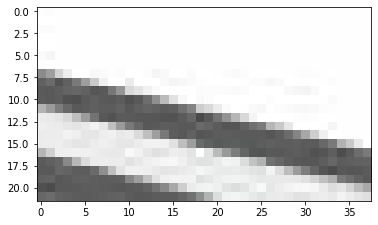

In [1050]:
x=(len(QuadTree.tiles))
print(x)
y= len(QuadTree.tiles[x-1])
print (y)
print(QuadTree.tiles[x-1])
qd = QuadTree.tiles[x-1][y-1]

plt.imshow(qd.img)
print(type(qd.img))
import sys
print((qd.img.shape))
print((qd.img.nbytes))


(22, 38, 3)


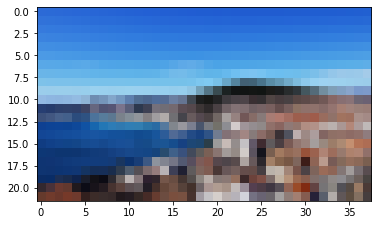

In [1051]:
n_img=mod_image('./split-Croatia.jpg',qd.img.shape[1],qd.img.shape[0])
print(n_img.shape)
# print(n_img)
plt.imshow(n_img)
plt.show()

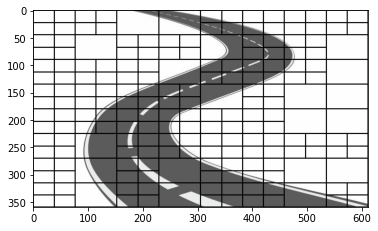

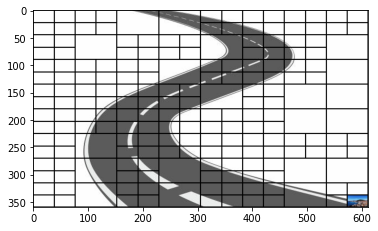

In [1052]:
plt.imshow(quadtree.get_image(4))
plt.show()
update_tile(qd,n_img)
plt.imshow(quadtree.get_image(4))
plt.show()

In [1053]:
# import socket
# import time
# import pickle
#
#
#
# HEADERSIZE= 10
# # create the socket
# # AF_INET == ipv4
# # SOCK_STREAM == TCP
# s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# s.bind((socket.gethostname(), 1234))
# s.listen(5)
#
# while True:
#     # now our endpoint knows about the OTHER endpoint.
#     clientsocket, address = s.accept()
#     print(f"Connection from {address} has been established.")
#     # d = {1: "Hey", 2: "There"}
#
#     msg = pickle.dumps(quadtree)
#     # print(msg)
#     msg = bytes(f'{len(msg):<{HEADERSIZE}}',"utf-8")+ msg
#     clientsocket.send(msg)
#     clientsocket.close()